# Classification de texte avec scikit-learn

Nous disposons dans ce TP des mêmes données que pour le TP précédent. Nous aurons cette fois-ci plusieurs textes dans 3 langues différentes : le français, l'anglais et l'italien.

Nous souhaitons développer un classifier, c'est à dire une fonction qui pourra prendre en entrée une suite de phrases et indiquer la langue de chacune.

Les phrases ne seront pas passées sous leur forme brute, nous devons les transformer en vecteur. Pour cela, nous allons compter le nombre d'occurence de chaque lettre de l'alphabet dans chaque phrase et entrainer le classifier dessus.

## Étape 1 : Récupération du texte

Nous allons récupérer les données de la même manière qu'au TP précédent. Nous allons également récupérer, pour chaque texte que l'on va charger, la langue dans laquelle il est écrit. Nous nous servirons ainsi de ces textes pour l'entrainement.

In [209]:
import glob

text = {
    'fr': "",
    'en': "",
    'it': ""
}

## ----- TODO : Remplir la variable text avec les textes des 3 langues ----- ##
## -------------------------------------------------------------------------- ##
        

assert "Le Chat grimaça en apercevant Alice" in text['fr'], "Vous devez charger le contenu du livre dans la variable."

print(text['fr'][:200])

﻿Au lecteur

  Ce livre électronique reproduit intégralement le texte original,
  et l'orthographe d'origine a été conservée. Seules les erreurs
  clairement introduites par le typographe ont été corr


## Étape 2 : Creation du tableau en python

Nous souhaitons entrainer notre modèle sur des phrases, pour cela nous allons découper le texte de chaque langue grâce à la fonction `sent_tokenize` de nltk.

L'objectif est d'avoir un tableau avec une colonne `lang` pour la langue et une colonne `sentence` pour la phrase. Nous aurons ainsi une ligne par phrase.

Exemple de data : 
```python
data = \
['fr', "\ufeffAu lecteur\n\n  Ce livre électronique reproduit intégralement le texte original,\n  et l'orthographe d'origine a été conservée."]
['fr', 'Seules les erreurs\n  clairement introduites par le typographe ont été corrigées.']
...
```

In [210]:
from nltk.tokenize import sent_tokenize
import numpy as np

## ----- TODO : Remplir la variable `data` qui est un tableau à 2 dimensions ----- ##
## ------------------------------------------- ##

assert len(np.array(data).shape) == 2 and  np.array(data).shape >= (1000, 2)
    


['fr', "\ufeffAu lecteur\n\n  Ce livre électronique reproduit intégralement le texte original,\n  et l'orthographe d'origine a été conservée."]
['fr', 'Seules les erreurs\n  clairement introduites par le typographe ont été corrigées.']
['fr', 'La liste\n  de ces corrections se trouve à la fin du texte.']
['fr', 'Cependant «Shere-Khan» a été tacitement remplacé par «Shere Khan» et\n  «Bandar Log» par «Bandar-Log».']
['fr', 'LE LIVRE DE LA JUNGLE\n\n\n\n\n  JUSTIFICATION DU TIRAGE\n\n  [Illustration]\n\n  Droits de reproduction réservés pour tous pays, y compris la Suède\n  et la Norvège.']


## Étape 3 : Constitution du Dataframe

Scikit-learn prend en donnée d'entrainement un DataFrame pandas.

In [249]:
import pandas as pd

df = pd.DataFrame(data)
df.columns = ['lang', 'sentence']

df.sample(frac=1)[:10]


,lang,sentence
9892,en,"""I have never seen one."
1282,fr,--Pas tout seul--peut-être... mais j'ai amené ...
10448,en,Had they been\nalone they could have gone twic...
6287,fr,La plupart s'en fâchoient; mais que leur servo...
17310,en,"The Lion, calling counsel, spoke--\n ""Dear ..."
9769,fr,Information about the Mission of Project Guten...
6050,fr,Voilà mes chiens à boire: ils perdirent l'hale...
1669,fr,Les _holluschickies_ s'ébranlèrent pesamment d...
9585,fr,"""Je n'ai pas un mille de haut,"" dit-elle."
20028,it,"disse Alice, nuotando, e cercando\nd'afferrar ..."


## Étape 4 : Équilibrer les données

Si on observe les données, on voit que le nombre de phrases en italien est bien inférieur au nombre de phrases en anglais et en français.

Il est préférable d'avoir un jeu de données bien équilibré, nous allons donc réduire le nombre de phrases en anglais/français au même nombre que de phrases en italien.

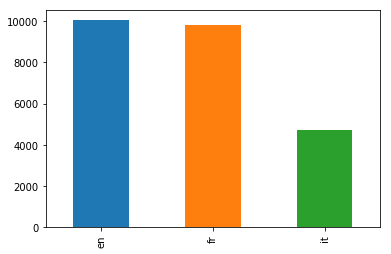

In [250]:
df.lang.value_counts().plot.bar()

In [251]:
## ----- TODO : Avec pandas, ou avec les listes python, équilibrer le DataFrame et le réaffecter dans df ----- ##
## ----------------------------------------------------------------------------------------------------------- ##

assert len(set(df.groupby(by='lang').size())) == 1

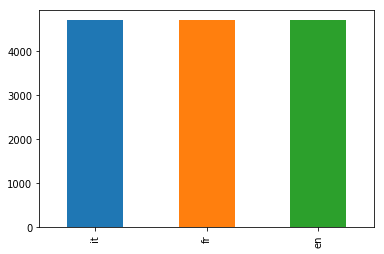

In [252]:
df.lang.value_counts().plot.bar()

## Étape 5 : Nettoyage des données

Nous avons une matrice de données contenant du texte brut. Nous souhaitons à terme compter le nombre d'occurence de chaque lettre dans les phrases.

Nous allons ici construire la fonction `clean_sentence` permettant, à partir d'une phrase, d'enlever la ponctuation, les accents, les caractères spéciaux, les espaces et de tout passer en minuscule.  
Nous allons pour cela, entre autres, utiliser la fonction `word_tokenize` de nltk et `normalize` de unicodedata.

In [254]:
from nltk.tokenize import word_tokenize
import unicodedata

def clean_sentence(sentence):
    ## ----- TODO : Nettoyer la phrase ----- ##
    ## ------------------------------------- ##
    return sentence

assert clean_sentence("Bonjour à tous ##") == "bonjouratous"

## Étape 6 : Observer les données

Nous souhaitons travailler sur l'occurence des lettres, mais est-ce vraiment une bonne idée ? Il est souhaitable d'observer les données avant de lancer pour valider que l'on peut bien classifier dessus.

Nous allons etudier la fréquence de chaque lettre dans les différentes langues afin de voir si nous observons bien une différence.

In [257]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def get_letters_freq(data):
    joined_text = {
        "fr": "",
        "en": "",
        "it": ""
    }
    for datum in data:
        joined_text[datum[0]] += clean_sentence(datum[1])
        
    total_letters = {}
    for lang in joined_text.keys():
        total_letters[lang] = len(joined_text[lang])
    
    ## ----- TODO : 2D list avec une lettre par ligne et une langue par colonne. La valeur est la frequence d'apparition de la lettre pour la langue (entre 0 et 1) ----- ##
    ## ------------------------------------------------------------------------------------------------------------------------------------------------------------------ ##
    
    for index, letter in enumerate(alphabet):
        letters_data[index].insert(0, letter)
    return letters_data
            
letters_freq = get_letters_freq(data)

letters_freq_df = pd.DataFrame(letters_freq)
letters_freq_df.columns = ["letter", "fr", "en", "it"]
letters_freq_df = letters_freq_df.set_index("letter")
letters_freq_df[:10]

,fr,en,it
letter,,,
a,0.081573,0.082651,0.110775
b,0.010069,0.015493,0.010512
c,0.029714,0.023613,0.048476
d,0.033093,0.043549,0.036557
e,0.166486,0.125262,0.116389
f,0.011869,0.022466,0.011779
g,0.011491,0.021217,0.019595
h,0.010966,0.067417,0.012089
i,0.071727,0.064805,0.110453


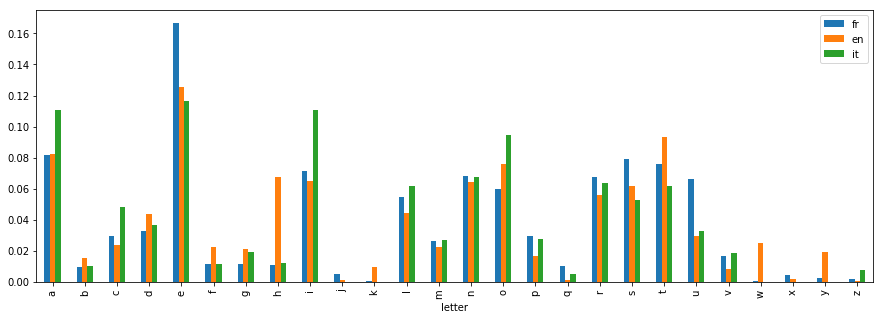

In [161]:
letters_freq_df.plot.bar(figsize=(15, 5))

## Étape 7 : Préparation au format attendu par le classifier

Nous allons utiliser le classifier [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) qui prend en entrée le jeu de données d'entrainement d'un côté, et les classes qui y sont associées de l'autre. Il faut donc obtenir les deux vecteurs associés.

Nous allons de plus découper notre jeu de données en données d'entrainement et en données de test pour nous permettre de valider le modèle sur des données inconnues. Nous allons pour cela appliquer la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit_learn.

In [258]:
from sklearn.model_selection import train_test_split

y = df['lang']
X = df['sentence']

## ----- TODO : Appliquer la fonction train_test_split de scikit-learn ----- ##
## ------------------------------------------------------------------------- ##



Le classifier attend un vecteur en entrée, nous allons donc pouvoir utiliser un vectorizer déjà implémenté par scikit-learn qui va permettre de compter l'occurence de chaque lettre dans le mot et ressortir un vecteur de taille 26.

In [266]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(preprocessor=clean_sentence, analyzer="char")
vectorizer.fit(X_train)
Xvec_train = vectorizer.transform(X_train)
Xvec_test = vectorizer.transform(X_test)

print(X_train[:5])
Xvec_train[:5].todense()

7424                                      Moi l'emporter!
5982    --Il n'a pas mangé,--dit Baloo, en grognant de...
8460    Les daubeurs ont leur tour d'une ou d'autre ma...
6478    Ayant donc mis à part les entretiens frivoles,...
3074    We shall not seek for any further homage to hi...
Name: sentence, dtype: object


matrix([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [13,  5,  0,  5, 14,  1,  5,  2,  5,  0,  0,  4,  4,  8,  6,  2,
          0,  5,  4,  9,  6,  1,  0,  1,  0,  0],
        [ 5,  1,  1,  3, 14,  0,  0,  0,  3,  0,  0,  2,  1,  8,  6,  1,
          0,  9,  6,  3,  8,  1,  0,  0,  0,  0],
        [ 8,  2,  2,  1, 12,  1,  0,  0,  5,  0,  0,  5,  3,  7,  6,  2,
          0,  9,  9,  8,  5,  1,  0,  0,  1,  0],
        [11,  4,  4,  1, 15,  2,  4, 13, 10,  0,  2,  2,  2,  9, 11,  2,
          0, 11, 12, 11,  5,  0,  4,  0,  2,  0]])

Nous pouvons maintenant entrainer le classifier sur notre vecteur d'entrainement. Une fois entrainé, nous pouvons le valider avec la fonction `score` de ce classifier.

In [1]:
from sklearn.naive_bayes import MultinomialNB

cls = MultinomialNB()
cls.fit(Xvec_train, y_train)

## ----- TODO : Valider le classifier avec la fonction score sur le jeu de test ----- ##
## ---------------------------------------------------------------------------------- ##

print(f"{score:.1%}")  # > 80% ?

ModuleNotFoundError: No module named 'sklearn'

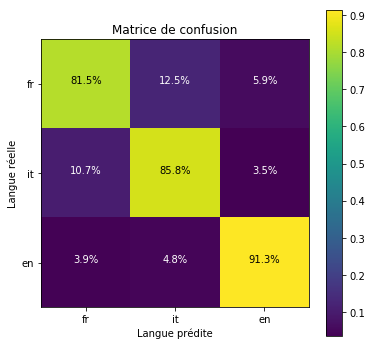

In [269]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(y_validation, predicted_y_validation):
    langs = y_validation.unique()
    cm = confusion_matrix(y_validation, predicted_y_validation, langs)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    plt.title("Matrice de confusion")
    plt.imshow(cm_normalized)
    plt.colorbar()
    tick_marks = np.arange(len(langs))
    plt.xticks(tick_marks, langs)
    plt.yticks(tick_marks, langs)
    plt.ylabel('Langue réelle')
    plt.xlabel('Langue prédite')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j], '.1%'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")

plot_confusion_matrix(y_test, cls.predict(Xvec_test))

## Appliquer à vos propres données

Maintenant que le classifier est entrainé, nous pouvons l'appliquer sur de nouvelles données. Essayez de classifier les données contenues dans la liste `hello` ci-dessous.

In [270]:
hello = ["Hello everyone", "Bonjour à tous", "Ciao a tutti"]

## ----- TODO : Classifier les phrases contenues dans la liste à l'aide du modèle précedemment entrainé ----- ##
## ---------------------------------------------------------------------------------------------------------- ##

array(['en', 'fr', 'it'], dtype='<U2')

## Et maintenant ?

Maintenant que vous avez entrainé votre premier modèle de Machine Learning avec scikit-learn, nous allons pousser un peu un peu plus loin en regardant le deep-learning via **Pytorch** !